# Bagging example

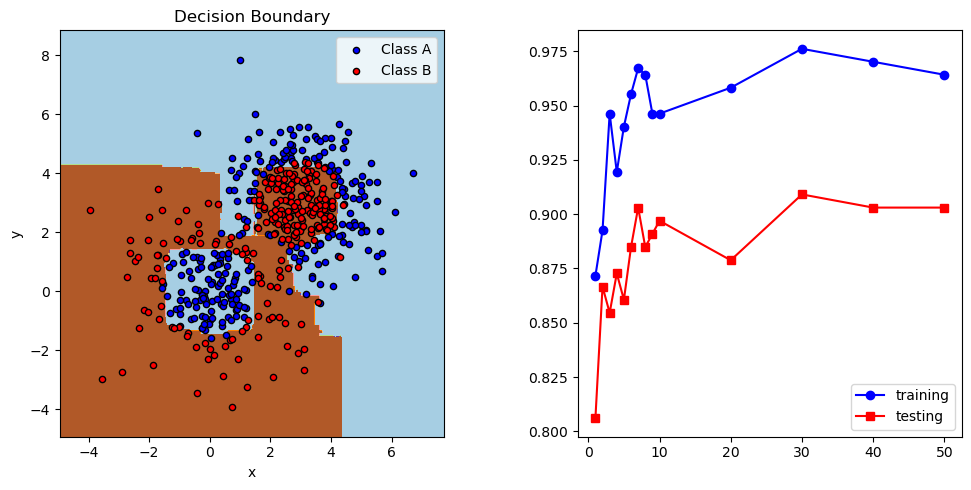

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))


#get training and test error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

acc_train_history = []
acc_test_history = []
acc_numWeakClassifier = []

#for numWeakClassifier in [1]:
for numWeakClassifier in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]:

    # Create and fit an Bagging Classifier based on Decision Trees
    #decision stump - PLAY AROUND!
    #bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=1), max_samples=0.5,
    #                           n_estimators=numWeakClassifier)
    #grown tree
    bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=None), max_samples=0.5,
                               n_estimators=numWeakClassifier)


    bdt.fit(X_train, y_train)

    # Get predictions
    pred_train = bdt.predict(X_train)
    pred_test = bdt.predict(X_test)
    
    # create performance measurements
    acc_train = accuracy_score(pred_train, y_train)
    acc_test = accuracy_score(pred_test, y_test)
    #print ("Training acc: ", acc_train)
    #print ("Testing acc:  ", acc_test)
    
    acc_train_history.append(acc_train)
    acc_test_history.append(acc_test)
    acc_numWeakClassifier.append(numWeakClassifier)

    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"

    plt.figure(figsize=(15, 5))

    # Plot the decision boundaries
    plt.subplot(131)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")

    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, cmap=plt.cm.Paired,
                    s=20, edgecolor='k',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    # Plot the two-class decision scores
    plt.subplot(132)
    plt.plot(acc_numWeakClassifier, acc_train_history, 'bo-', label="training")
    plt.plot(acc_numWeakClassifier, acc_test_history, 'rs-', label="testing")
    plt.legend()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35)
    #plt.show()
    
    display.clear_output(wait=True)
    plt.pause(1.0/50.0)


# Boosting example

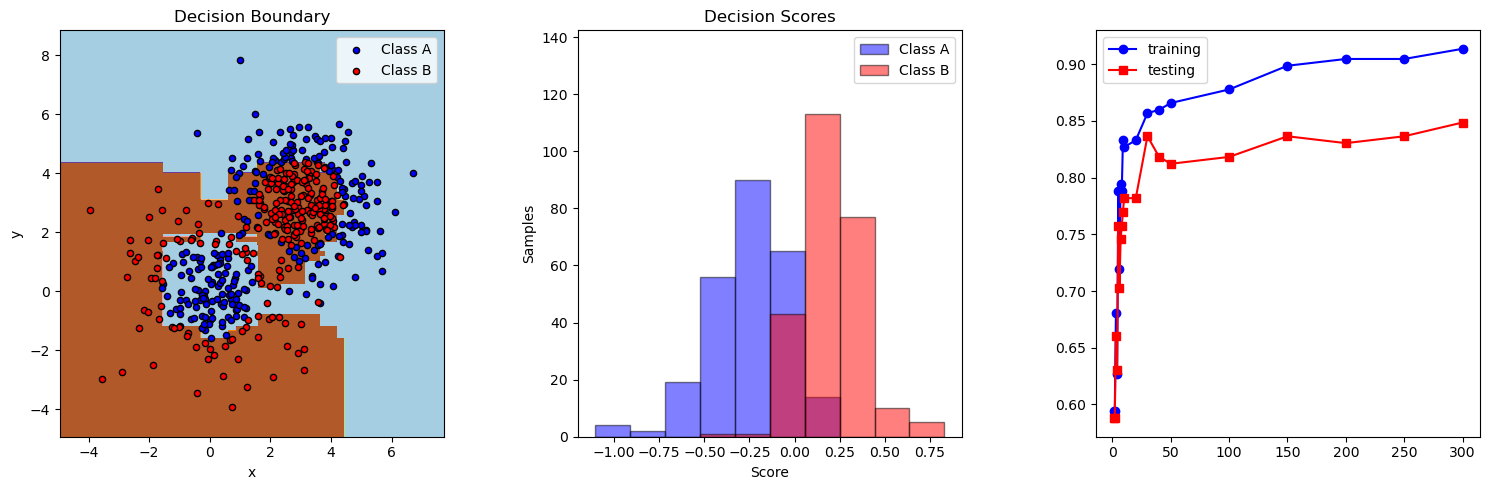

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))


#get training and test error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

acc_train_history = []
acc_test_history = []
acc_numWeakClassifier = []

#for numWeakClassifier in [1]:
for numWeakClassifier in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300]:

    # Create and fit an AdaBoosted decision tree (stump)
    # NOTE: only linear decision -- decision STUMP!
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=numWeakClassifier)

    bdt.fit(X_train, y_train)

    # Get predictions
    pred_train = bdt.predict(X_train)
    pred_test = bdt.predict(X_test)
    
    # create performance measurements
    acc_train = accuracy_score(pred_train, y_train)
    acc_test = accuracy_score(pred_test, y_test)
    #print ("Training acc: ", acc_train)
    #print ("Testing acc:  ", acc_test)
    
    acc_train_history.append(acc_train)
    acc_test_history.append(acc_test)
    acc_numWeakClassifier.append(numWeakClassifier)

    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"

    plt.figure(figsize=(15, 5))

    # Plot the decision boundaries
    plt.subplot(131)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")

    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, cmap=plt.cm.Paired,
                    s=20, edgecolor='k',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    # Plot the two-class decision scores
    twoclass_output = bdt.decision_function(X)
    plot_range = (twoclass_output.min(), twoclass_output.max())
    plt.subplot(132)
    for i, n, c in zip(range(2), class_names, plot_colors):
        plt.hist(twoclass_output[y == i],
                 bins=10,
                 range=plot_range,
                 facecolor=c,
                 label='Class %s' % n,
                 alpha=.5,
                 edgecolor='k')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, y1, y2 * 1.2))
    plt.legend(loc='upper right')
    plt.ylabel('Samples')
    plt.xlabel('Score')
    plt.title('Decision Scores')

    plt.subplot(133)
    plt.plot(acc_numWeakClassifier, acc_train_history, 'bo-', label="training")
    plt.plot(acc_numWeakClassifier, acc_test_history, 'rs-', label="testing")
    plt.legend()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35)
    #plt.show()
    
    display.clear_output(wait=True)
    plt.pause(1.0/50.0)
